In [10]:
%matplotlib inline
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)

/home/jordi/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [43]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X, y = mnist["data"], mnist["target"]
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Label: 9


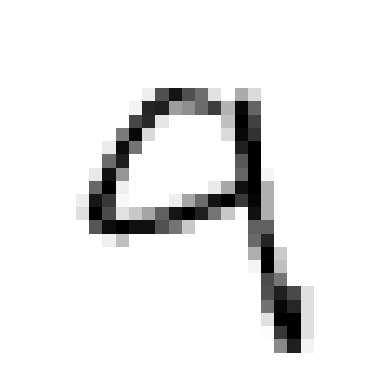

In [44]:
def plot_digit(X, y, index):
    some_digit = X[index if index < len(X) else len(X) - 1]
    some_digit_image = some_digit.reshape(28, 28)
    print("Label: " + str(y[index]))
    plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

plot_digit(X_train, y_train, 0)

In [47]:
# Standarize the data
scaler = StandardScaler()  # unit variance and zero mean
X_train_scaled = scaler.fit_transform(X_train.astype(np.float16))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float16))
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

Accuracy: 0.943


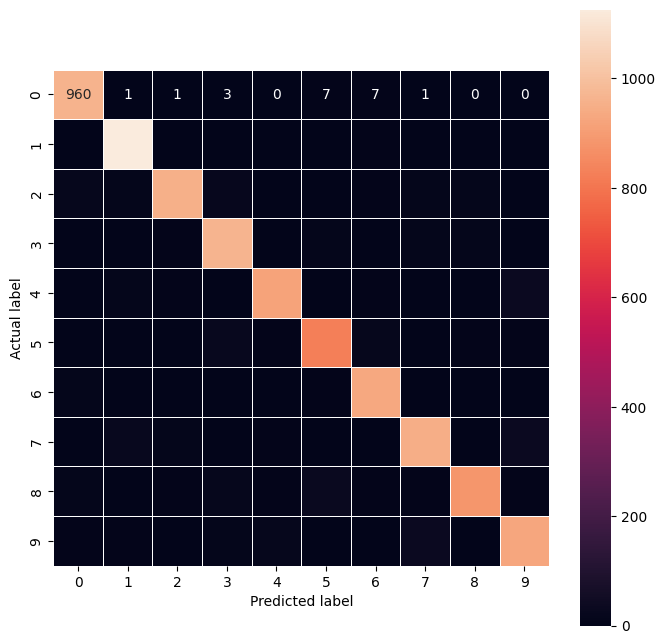

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train the model
knn_clf = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=-1)
knn_clf.fit(X_train_scaled, y_train)

# Predict
y_pred = knn_clf.predict(X_test_scaled)

# Evaluate
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mx, annot=True, fmt="d", linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [55]:
from sklearn.metrics import recall_score

# Predict the labels for the test set
y_pred = knn_clf.predict(X_test_scaled)

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


Recall: 0.9447392933879233
